<h1>Mono product multi period inventory problem</h1>
<p>The followin notebook shows hot to use a library for solving the mono product multi period inventory problem.
</p>
<p>This model find the optimal purchase plan that optimize the total relevant cost (TRC) given an initial inventory, minimun batch size, holding product at inventory cost, placing order cost, safety stock to keep, based in a given sales forecast and a previous purchase plan.</p>

<p>First, we are going to import the requested libraries:</p>

In [1]:
from lp_supply import inventory_solvers as pa
import matplotlib.pyplot as plt
import numpy as np

<p>In the following cell we are setting the initial parameters, they will be used as input.
</p>

In [2]:
leadtime = 5
initialInventory = 25
minpurchasequantity = 12
maxCapacity = [200, 200, 200, 200, 200, 200, 200, 200, 0, 200, 0, 200, 200, 200, 200]
purchasecost = 100
safetystock = 5.0
holdingcost = 20*0.5
#forecast = np.random.exponential(scale=5, size=20)
forecast = [5, 5, 5, 4, 4, 10, 5, 5, 5, 5, 5, 5, 50, 5, 5]
arrivals = [0, 0, 0, 0, 0]

<p>Ahora creamos una instancia de la clase de Planeación agregada y pasamos los parámetros al constructor, posteriormente llamamos al metodo solve() que retornará el plan de compras y el inventario proyectado con base en el plan.</p>

In [3]:
planeacion = pa.PlaneacionAgregada(leadtime, 
                                   initialInventory, 
                                   minpurchasequantity, 
                                   purchasecost, 
                                   holdingcost, 
                                   forecast,
                                   arrivals,
                                   maxCapacity,
                                   safetystock)
plan, proyInventory, inventoryCost = planeacion.solve(verbose=False)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/luispinilla/Documents/inventory_management_lp/lp_optimal_supply/venv/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/zc/7j16sq9s55d3sj1zm53r4lb80000gn/T/3fd1bd0700a9487fbbecadbda90b91a8-pulp.mps branch printingOptions all solution /var/folders/zc/7j16sq9s55d3sj1zm53r4lb80000gn/T/3fd1bd0700a9487fbbecadbda90b91a8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 60 COLUMNS
At line 228 RHS
At line 284 BOUNDS
At line 345 ENDATA
Problem MODEL has 55 rows, 45 columns and 107 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 1131.5 - 0.00 seconds
Cgl0004I processed model has 24 rows, 25 columns (12 integer (12 of which binary)) and 64 elements
Cbc0038I Initial state - 8 integers unsatisfied sum - 0.731707
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 6530 iterations 8
Cbc0038I Solution found of 6530
Cbc0038I R

<p>visualizar todos los resultados:</p>

In [5]:
print("Inventory plan cost = {0}".format(inventoryCost))
print('plan:\t', plan)
print('fcast:\t', forecast)
print('inv.:\t', proyInventory)

Inventory plan cost = 10.0*InventoryAt0 + 10.0*InventoryAt1 + 10.0*InventoryAt10 + 10.0*InventoryAt11 + 10.0*InventoryAt12 + 10.0*InventoryAt13 + 10.0*InventoryAt14 + 10.0*InventoryAt2 + 10.0*InventoryAt3 + 10.0*InventoryAt4 + 10.0*InventoryAt5 + 10.0*InventoryAt6 + 10.0*InventoryAt7 + 10.0*InventoryAt8 + 10.0*InventoryAt9 + 100*PlacePO0 + 100*PlacePO1 + 100*PlacePO10 + 100*PlacePO11 + 100*PlacePO12 + 100*PlacePO13 + 100*PlacePO14 + 100*PlacePO2 + 100*PlacePO3 + 100*PlacePO4 + 100*PlacePO5 + 100*PlacePO6 + 100*PlacePO7 + 100*PlacePO8 + 100*PlacePO9
plan:	 [18.0, 0.0, 15.0, 0.0, 0.0, 12.0, 0.0, 58.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
fcast:	 [5, 5, 5, 4, 4, 10, 5, 5, 5, 5, 5, 5, 50, 5, 5]
inv.:	 [20.0, 15.0, 10.0, 6.0, 2.0, 10.0, 5.0, 15.0, 10.0, 5.0, 12.0, 7.0, 15.0, 10.0, 5.0]


<p>Presentar un gráfico con el plan contruido.</p>

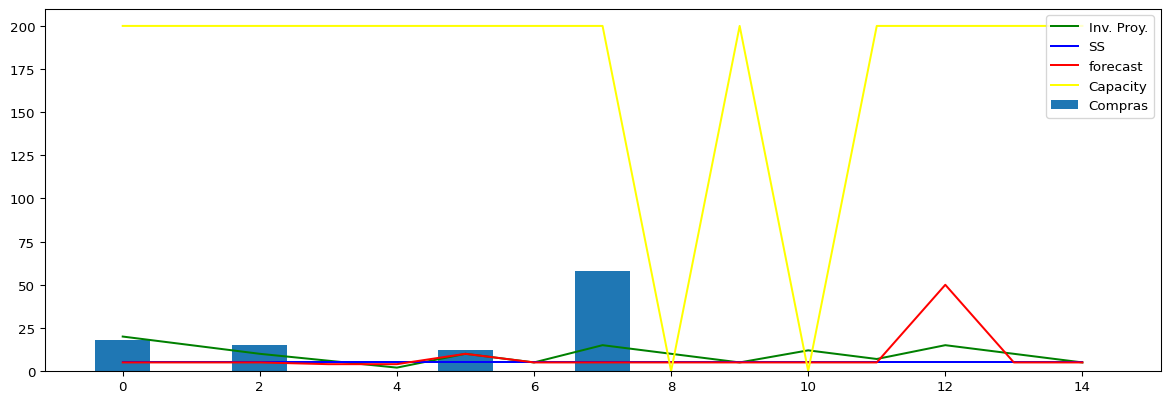

In [ ]:
x = np.arange(len(forecast))
plt.figure(num=None, dpi=96, figsize=(15,5))
plt.bar(x, plan, label="Compras")
plt.plot(x, proyInventory, label="Inv. Proy.", color="green")
plt.plot(x, np.zeros(len(forecast)) + safetystock, label="SS", color="blue")
plt.plot(x, forecast, label="forecast", color="red")
plt.plot(x, maxCapacity, label="Capacity", color="yellow")
plt.legend(loc = 1)
plt.show()# pendiente despliegue